In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import os 
os.chdir("D:/Training/Academy/ML(Python)/Datasets")

In [16]:
milk = pd.read_csv("milk.csv", index_col=0)
scaler = StandardScaler().set_output(transform='pandas')
df_scaled = scaler.fit_transform(milk) 

In [17]:
km = KMeans(n_clusters=4, random_state=25)
km.fit(df_scaled)
silhouette_score(df_scaled, km.labels_)

c:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0.42324551444775393

In [18]:
scores = []
for k in [2,3,4,5,6,7,8]:
    km = KMeans(n_clusters=k, random_state=25)
    km.fit(df_scaled)
    scores.append([k, silhouette_score(df_scaled, km.labels_)])
df_scores = pd.DataFrame( scores, columns=['k', 'score'] )
df_scores.sort_values( 'score', ascending=False )

c:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

,k,score
0,2,0.525851
2,4,0.423246
4,6,0.412161
3,5,0.399843
5,7,0.398780
6,8,0.397209
1,3,0.353503


##### Cluster Analysis

In [21]:
km = KMeans(n_clusters=2, random_state=25)
km.fit(df_scaled)
df_cluster = milk.copy()
df_cluster['cluster'] = km.labels_
df_cluster.groupby('cluster').mean() # cluster centroids

c:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,water,protein,fat,lactose,ash
cluster,,,,,
0,63.362500,10.412500,21.662500,1.975000,1.347500
1,85.158824,4.235294,4.964706,5.147059,0.635294


In [22]:
df_cluster.sort_values('cluster')

,water,protein,fat,lactose,ash,cluster
Animal,,,,,,
DOLPHIN,44.9,10.6,34.9,0.9,0.53,0
WHALE,64.8,11.1,21.2,1.6,1.70,0
REINDEER,64.8,10.7,20.3,2.5,1.40,0
DEER,65.9,10.4,19.7,2.6,1.40,0
RAT,72.5,9.2,12.6,3.3,1.40,0
RABBIT,71.3,12.3,13.1,1.9,2.30,0
DOG,76.3,9.3,9.5,3.0,1.20,0
SEAL,46.4,9.7,42.0,0.0,0.85,0
ELEPHANT,70.7,3.6,17.6,5.6,0.63,1


### PCA

In [8]:
from sklearn.decomposition import PCA

c:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


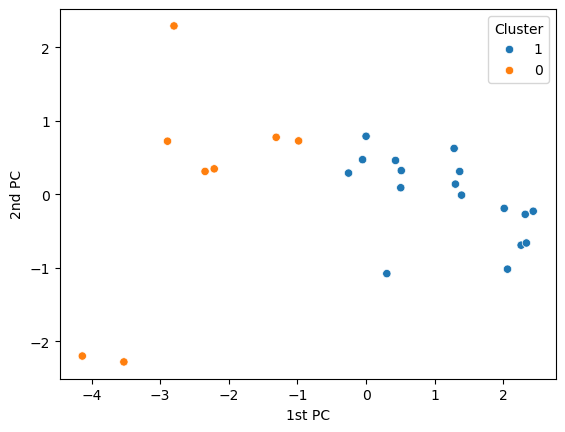

In [10]:
scaler = StandardScaler().set_output(transform='pandas')
df_scaled = scaler.fit_transform(milk) 
prcomp = PCA().set_output(transform='pandas')
pca_data = prcomp.fit_transform(df_scaled)
km = KMeans(n_clusters=2, random_state=25)
km.fit(df_scaled)
pca_data = pca_data.iloc[:,:2]
pca_data['Cluster'] = km.labels_
pca_data['Cluster'] = pca_data['Cluster'].astype(str)
sns.scatterplot(data=pca_data, x='pca0',y='pca1',hue='Cluster')
plt.xlabel("1st PC")
plt.ylabel("2nd PC")
plt.show()

### Nutrient

In [25]:
nut = pd.read_csv("nutrient.csv", index_col=0)
scaler = StandardScaler().set_output(transform='pandas')
df_scaled = scaler.fit_transform(nut) 

In [26]:
scores = []
for k in [2,3,4,5,6,7,8]:
    km = KMeans(n_clusters=k, random_state=25)
    km.fit(df_scaled)
    scores.append([k, silhouette_score(df_scaled, km.labels_)])
df_scores = pd.DataFrame( scores, columns=['k', 'score'] )
df_scores.sort_values( 'score', ascending=False )

c:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

,k,score
2,4,0.419974
5,7,0.402943
4,6,0.381370
3,5,0.378018
6,8,0.377523
1,3,0.357822
0,2,0.325778


In [28]:
km = KMeans(n_clusters=2, random_state=25)
km.fit(df_scaled)
df_cluster = nut.copy()
df_cluster['cluster'] = km.labels_
df_cluster.groupby('cluster').mean() # cluster centroids

c:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,energy,protein,fat,calcium,iron
cluster,,,,,
0,145.555556,19.0,6.444444,61.555556,2.338889
1,331.111111,19.0,27.555556,8.777778,2.466667


In [29]:
df_cluster.sort_values('cluster')

,energy,protein,fat,calcium,iron,cluster
Food_Item,,,,,,
BEEF TONGUE,205,18,14,7,2.5,0
SARDINES CANNED,180,22,9,367,2.5,0
SALMON CANNED,120,17,5,159,0.7,0
PERCH FRIED,195,16,11,14,1.3,0
MACKEREL CANNED,155,16,9,157,1.8,0
MACKEREL BROILED,200,19,13,5,1.0,0
HADDOCK FRIED,135,16,5,15,0.5,0
CRABMEAT CANNED,90,14,2,38,0.8,0
CLAMS CANNED,45,7,1,74,5.4,0


c:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


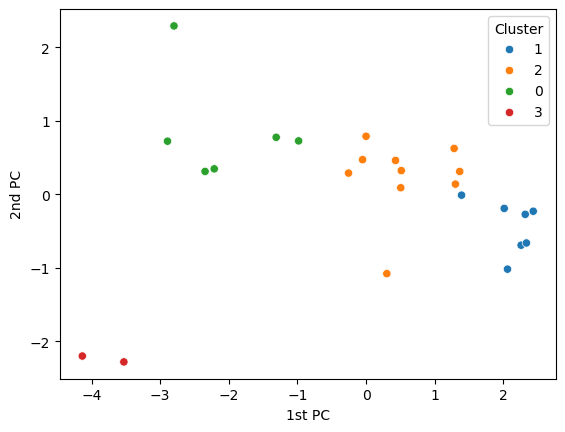

In [14]:
scaler = StandardScaler().set_output(transform='pandas')
df_scaled = scaler.fit_transform(milk) 
prcomp = PCA().set_output(transform='pandas')
pca_data = prcomp.fit_transform(df_scaled)
km = KMeans(n_clusters=4, random_state=25)
km.fit(df_scaled)
pca_data = pca_data.iloc[:,:2]
pca_data['Cluster'] = km.labels_
pca_data['Cluster'] = pca_data['Cluster'].astype(str)
sns.scatterplot(data=pca_data, x='pca0',y='pca1',hue='Cluster')
plt.xlabel("1st PC")
plt.ylabel("2nd PC")
plt.show()